In [2]:
import numpy as np
import theano
import theano.tensor as T

Exercises
=====

1. Logistic function
----------
Create an expression for the logistic function $s(x) = \frac{1}{1+exp(-x)}$. Plot the function and its derivative, and verify that $\frac{ds}{dx} = s(x)(1-s(x))$.

True

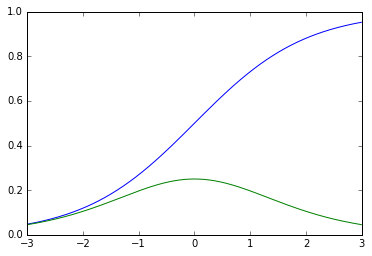

In [19]:
# %load ./spoilers/logistic.py
x = T.vector()
s = 1/(1+T.exp(-x))
ds = T.grad(T.sum(s), x) # Need sum to make s scalar

import matplotlib.pyplot as plt
%matplotlib inline

x0 = np.arange(-3, 3, 0.01).astype('float32')
plt.plot(x0, s.eval({x:x0}))
plt.plot(x0, ds.eval({x:x0}))

np.allclose(ds.eval({x:x0}), s.eval({x:x0}) * (1-s.eval({x:x0})))

2. Fibonacci sequence
--------
Calculate the 3rd to 10th terms of the sequence, defined by the recurrance relation $F_n = F_{n-2} + F_{n-1}$, with $F_1=1$ and $F_2=1$.

In [ ]:
# %load spoilers/fib.py
a = theano.shared(1)
b = theano.shared(1)
f = a + b
updates = {a: b, b: f}
next_term = theano.function([], f, updates=updates)

[next_term() for _ in range(3, 10)]

3. Game of Life
-------
Implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) with periodic boundary conditions (wrapping borders).

In [34]:
board = theano.shared(np.zeros((100, 100), dtype='uint8'))

initial = np.random.binomial(1, 0.1, size=(100, 100)).astype('uint8')
board.set_value(initial)

In [ ]:
# Create a function f that updates board with new values and return the current state
# Uncomment the line below and run for a solution
#%load spoilers/life.py

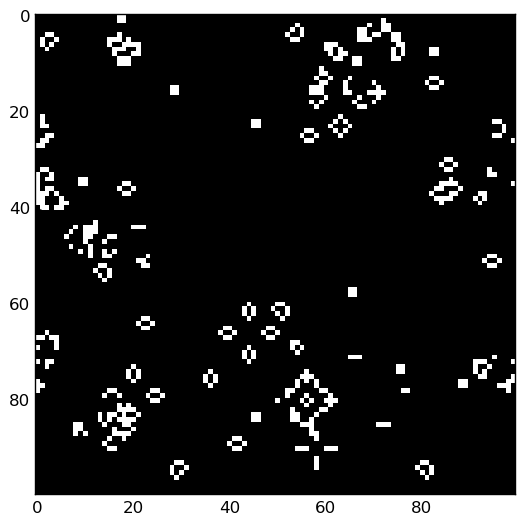

In [44]:
# After creating your f function, run this cell to animate the output
%matplotlib notebook
import matplotlib.pyplot as plt

from IPython import display
import time

for i in range(50):
    plt.gca().cla()
    current = f()
    plt.imshow(current, interpolation='nearest', cmap='gray')
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(0.1) 